In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

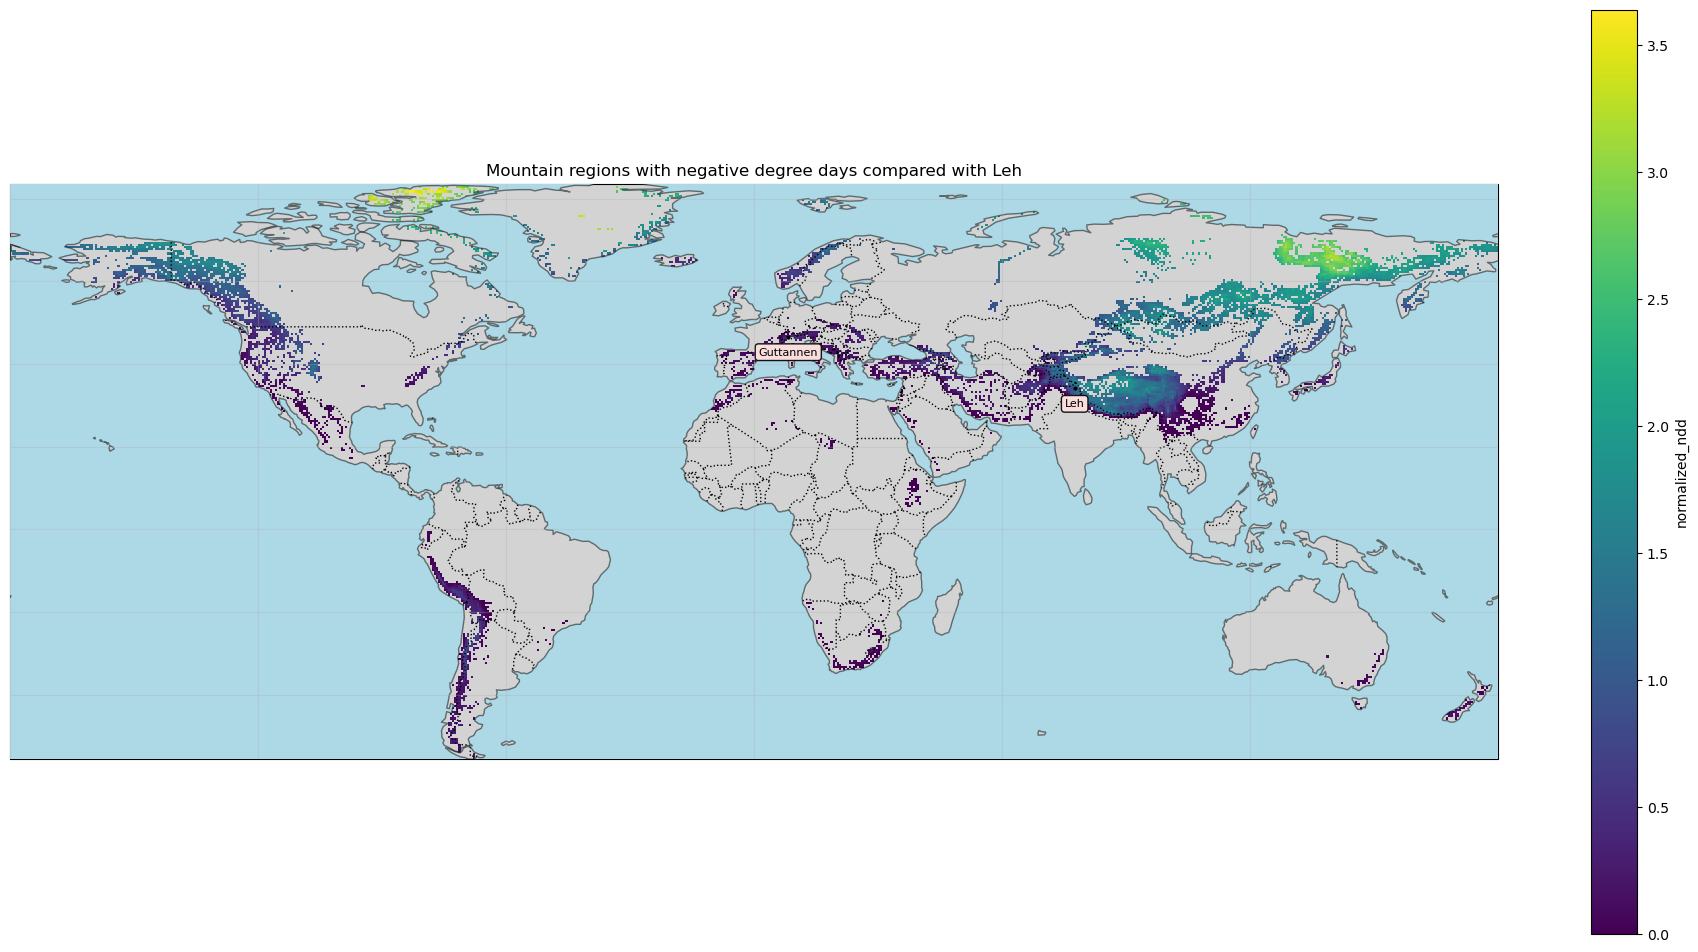

In [14]:
# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
nndd = dataset[var]

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,12))


# Plot nndd with the viridis colormap and color limits
cmap = plt.cm.viridis
cmap.set_bad('lightgrey')  # Set grey color for masked (invalid) values
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

guttannen = (46.65589345308665, 8.29117716055342)
ax.plot(guttannen[1], guttannen[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(guttannen[1], guttannen[0]-5,'Guttannen', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

# Set title and show the plot
plt.title('Mountain regions with negative degree days compared with Leh')
# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_ndd_layer.png", bbox_inches="tight", dpi=300)
plt.show()

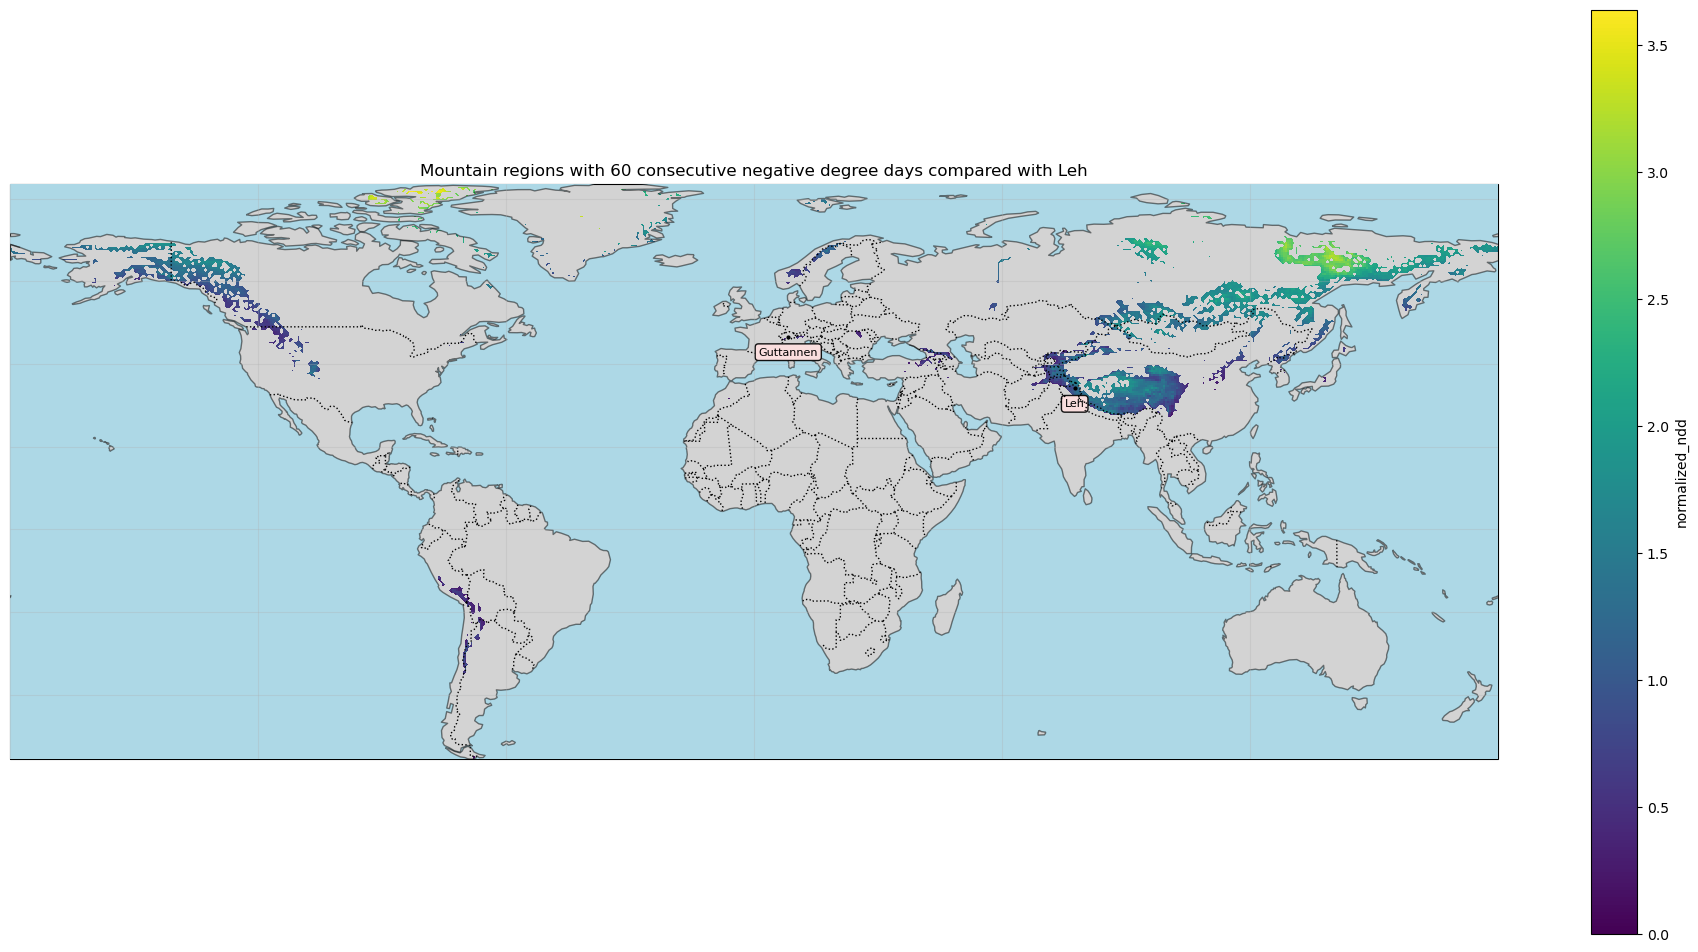

In [17]:
# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../output/mt+dis+temp+ndd.nc')
var = 'normalized_ndd'

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset[var]

# Set the window size
window_size = 60

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Replace NDD values of 0 with NaN
nndd_masked = nndd.where(nndd != 0, np.nan)

# Set up the map projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(24,12))

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = temperature < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)


# Plot nndd with the viridis colormap and color limits
cmap = plt.cm.viridis
cmap.set_bad('lightgray')  # Set grey color for masked (invalid) values
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Add map features
# Add country outlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', zorder=4)
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

guttannen = (46.65589345308665, 8.29117716055342)
ax.plot(guttannen[1], guttannen[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(guttannen[1], guttannen[0]-5,'Guttannen', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)

# Set title and show the plot
plt.title('Mountain regions with ' + str(window_size) + ' consecutive negative degree days compared with Leh')
# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_consecutive_ndd_layer.png", bbox_inches="tight", dpi=300)
plt.show()

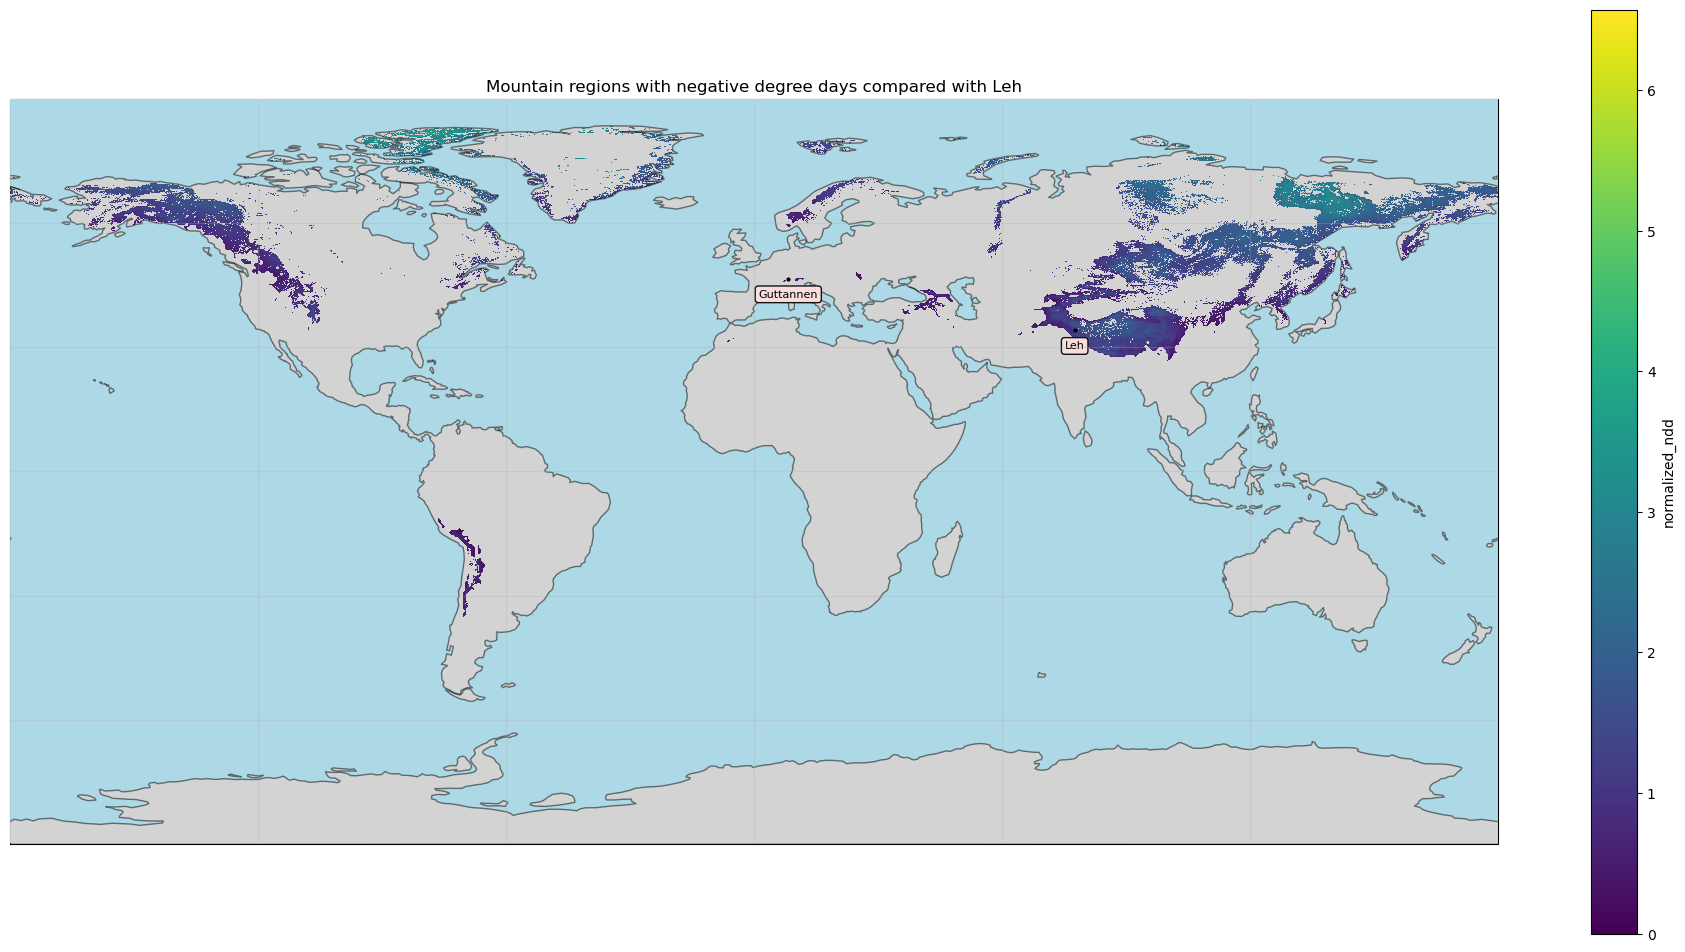

In [14]:
# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../output/wettasmin_W5E5v2.0_with_ndd.nc')


mt_dis = xr.open_dataset('../output/mt+dis.nc')

# Set the window size
window_size = 60

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset['wet_temperature']
nndd = dataset['normalized_ndd']

# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Define the threshold range
thresholds = np.arange(-2, -3, -1)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(24, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each threshold and plot filled contour regions
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = year_dataset < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    ax.contourf(lon, lat, mask_2d, colors=['lightgray', 'none'], transform=ccrs.PlateCarree(), zorder=2)


# Apply the mask to the nndd variable
# Convert the numpy mask to a boolean DataArray
#mask_dataarray = xr.DataArray(mask_2d, coords=nndd.coords, dims=nndd.dims)
#nndd_masked = nndd.where(mask_dataarray, drop=True)

# Plot the masked nndd values with the viridis colormap and color limits
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=nndd.max().values)
#nndd_masked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, zorder=1)
nndd.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, zorder=1)

# Create a custom colormap with lightgrey for 0 and None (transparent) for 1
cmap = plt.cm.colors.ListedColormap(['lightgrey', 'None'])
# Plot the 'Band1' data variable with the custom colormap
mt_dis.AGregions.plot(ax=ax, cmap=cmap, add_colorbar=False, zorder=3)

# Set the plot extent to cover the entire world
ax.set_global()
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=4)


# Set plot title and labels
ax.set_title('Mountain regions with negative degree days compared with Leh')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add map features
ax.coastlines(zorder=5, alpha=0.5)
ax.gridlines(zorder=5, alpha=0.3)

# Add a place marker for Leh
leh_coords = (34.163079280645604, 77.58554381044664)
ax.plot(leh_coords[1], leh_coords[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(leh_coords[1], leh_coords[0]-5,'Leh', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

guttannen = (46.65589345308665, 8.29117716055342)
ax.plot(guttannen[1], guttannen[0], marker='o', markersize=2, color='black', transform=ccrs.PlateCarree(), zorder=5)
# annotations, with some random placement to avoid overlap
ax.text(guttannen[1], guttannen[0]-5,'Guttannen', {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=ccrs.PlateCarree(),bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'), zorder=5)
# Save the figure
plt.savefig("../figs/mt_dis_wetbulb_ndd_layer.png", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()